# Programmierung des Algorithmus (Lösung)

Wir werden uns nun Schritt für Schritt die nötigen Methoden den k-Means-Clustering Algorithmus erarbeiten. Um am Ende nicht einen großen Codeblock erstellen zu müssen, werden wir soviel Vorarbeit wie möglich erledigen. So kannst du dich am Ende ganz auf die Implementierung der Teile des Algorithmus konzentrieren [Stichwort: externe kognitive Belastung gering halten, siehe [Cognitive Load Theory (CLT)](https://de.wikipedia.org/wiki/Cognitive_Load_Theory) 😉]

## Pseudocode
Nochmals die Grundidee des [Algorithmus](#k-means-clustering-algorithmus):
1. **Clusterzentren initialisieren:** Zu Beginn werden $k$ Zentroiden (Mittelwerte der Cluster) zufällig oder nach einer bestimmten Heuristik gewählt.
2. **Datenpunkte zuweisen:** Jeder Datenpunkt wird dem nächstgelegenen Clusterzentrum zugeordnet. Diese Zuordnung basiert üblicherweise auf der euklidischen Distanz.
3. **Zentroiden aktualisieren:** Nach der Zuordnung werden die Zentroiden neu berechnet, indem der Mittelwert aller Punkte in jedem Cluster bestimmt wird.
4. **Wiederholen**: Die Schritte der Zuordnung und Aktualisierung werden wiederholt, bis sich die Clusterzentren nicht mehr ändern oder eine maximale Anzahl von Iterationen erreicht wurde.

Folgend siehst du die Umsetzung des Algorithmus in Pseudocode nach der Formelsammlung, vervollständigt mit Kommentaren.

```
OPERATION k_means(
    daten: Liste<Datenpunkt>,
    k: int,
    max_iterationen: int) : (Liste<Datenpunkt>, Liste<Datenpunkt>)
    Lokale Variablen: 
        zentroiden: Liste<Datenpunkt>,
        neue_zentroiden: Liste<Datenpunkt>,
        cluster: Liste<Datenpunkt>

    # Initialisierung der Zentroiden
    zentroiden = initialisiere_zentroiden(daten, k)

    # Hauptalgorithmus: Wiederhole für maximal max_iterationen
    FÜR i=0 BIS max_iterationen SCHRITT 1
        # Cluster-Zuordnung: Weise jeden Datenpunkt dem nächsten Zentroiden zu
        cluster = berechne_cluster(daten, zentroiden)

        # Zentroiden-Aktualisierung: Berechne die neuen Zentroiden als Mittelwert der zugeordneten Punkte
        neue_zentroiden = aktualisiere_zentroiden(clusters)

        # Abbruchbedingung: Wenn die Zentroiden sich nicht mehr ändern, ist der Algorithmus fertig
        WENN neue_zentroiden == zentroiden  # Das ist die Abbruchbedingung!
            ABBRUCH
        ENDE WENN

        # Aktualisiere die Zentroiden für die nächste Iteration
        zentroiden = neue_zentroiden
    ENDE FÜR

    # Rückgabe der finalen Cluster-Zuordnung und Zentroiden
    RÜCKGABE (cluster, zentroiden)
```

Laut Pseudocode benötigen wir die Methoden `initialisiere_zentroiden()` `datenpunkte_zuweisen()` und `aktualisiere_zentroiden()`. Die Methode `initialisiere_zentroiden()` ist bereits implementiert.

Die beiden anderen Methoden sind deine Aufgabe. In beiden Fällen benötigst du die Eukledische Distanz (**A1**).  
Dann brauchst du eine Methode, die entscheidet, welcher Zentroid der nächste zu einem Datenpunkt ist (**A2**). Mit dieser Methode kannst du dann die Datenpunkte den Clustern zuweisen (**A3**).  
Danach müssen die Koordinaten der Zentroiden neu berechnet werden. Zunächst für einen (**A4**), dann für alle Zentroiden (**A5**).

**Deine Aufgaben sind:**  
- [A1](#a1): `berechne_euklidische_distanz()`
- [A2](#a2): `finde_naechsten_zentroiden()`
- [A3](#a3): `datenpunkte_zuweisen()`
- [A4](#a4): `berechne_zentroid_koordinaten()`
- [A5](#a5): `aktualisiere_zentroiden()`

Wenn alle Aufgaben erledigt, sollte [die Methode](k-means-final) `k_means()` korrekt funktionieren 😎.

```{admonition} Hinweis
:class: note
Die folgenden Unterpunkte bis zur [ersten Aufgabe](#k-means-aufgabe-1) sind nicht essentiel, um den Algorithmus zu verstehen, aber dennoch hilfreich für die spätere Implementierung. Und auch generell wichtig für das vielleicht spätere Leben als ProgrammiererIn.
```

## Vorentlastungen

Wir werden nun vor der ersten Aufgabe folgende Schritte bereits erledigen:
- Konfiguration von Unit Tests: für das Beschreiben der Methoden und für nachvollziehbare Testfälle
- Klasse `Datenpunkt`: für das Handling von X- und Y-Koordinaten
- Methode `generiere_datenpunkte()`: für das Generieren von zufälligen Datenpunkten
- Methode `initialisiere_zentroiden()`: für das Initialisieren der ersten Zentroiden

In den Aufgaben selber sind auch teilweise schon Tipps und Hilfen. Achte auf die Stelle `...  # Hier die weitere Lösung ergänzen`: nur dort muss dein Code hin 😉.

### Logging und Loglevel

Während der Programmierung ist es von großem Vorteil, Informationen, Warnungen und Fehler per **Logging** auszugeben. Diese Nachrichtensammlungen, **Logs** genannt, helfen dir, Fehler zu finden und die Ursache für Bugs zu verstehen.  

Nachrichten lassen sich mit verschiedenen **Loglevel** ausgeben. Das sind Kategorien, die angeben, wie wichtig eine Nachricht im Log ist. Meist gibt es die hierarchischen Loglevel `DEBUG`, `INFORMATION`, `WARNING`, `ERROR` und `FATAL`. Hierarchisch bedeutet: wenn der Loglevel `WARNING` gesetzt ist, dann werden alle Nachrichten $>=$ `WARNING` ausgegeben. Wenn der Loglevel `DEBUG` gesetzt ist, werden alle Nachrichten ohne Einschränkung ausgegeben.

Wir verwenden für unser Logging die Loglevel `DEBUG` und `INFORMATION`. Somit können wir generelle Programmablauf-Informationen ausgeben und auch mal Debug-Nachrichten, um einen Fehler in einer Methode zu finden. 

Damit du es in den Aufgaben einfacher hast, wird das Logging hier konfiguriert und aktiviert. Du kannst jederzeit
mit `logger.info()` und `logger.debug()` Nachrichten ausgeben. Nachrichten, die mit `logger.debug()` ausgegeben werden, werden nur angezeigt, wenn der Loglevel `DEBUG` gesetzt ist. Wenn du den Loglevel auf `logging.DEBUG` setzt, werden beide Nachrichten ausgegeben. Du kannst den Loglevel auch nur für bestimmte Bereiche oder Methoden ändern, siehe das Beispiel unten

```{admonition} Warum nicht print()
:class: note
Natürlich kannst du auch einfach alles mit `print()`-Befehlen ausgeben. Dann werden aber immer alle Nachrichten ausgegeben, außer du hast sie gerade auskommentiert. Mit dem Loglevel-Schalter lassen sich die Nachrichten so bequem filtern, wie die du es gerade brauchst, ohne die Nachrichten ein- und auskommentieren zu müssen.
```

In [2]:
import logging

# Konfiguration für das Logging
logging.basicConfig(format='%(levelname)s: %(message)s')
logger = logging.getLogger(__name__)

# Loglevel INFO:  Informationen über den Verlauf des Programms
# Loglevel DEBUG: Detaillierte Informationen für die Fehlersuche
logger.setLevel(logging.INFO)

# Info-Nachricht, hilfreich für den Programmverlauf
logger.info('Das Loggen ist eingerichtet')

# Debug-Nachricht, hilfreich für die Fehlersuche
logger.setLevel(logging.DEBUG)
logger.debug('Das Log-Level ist auf DEBUG gesetzt')
logger.debug('Diese Nachricht angezeigt, weil das Log-Level auf DEBUG gesetzt ist')
logger.setLevel(logging.INFO)
logger.info('Das Log-Level ist auf INFO gesetzt')
logger.debug('Diese Nachricht wird nicht angezeigt, weil das Log-Level nun auf INFO gesetzt ist')

# Finaler Loglevel. Diesen könnt ihr auch beliebig in den späteren Übungen setzen.
# Es zählt immer der zuletzt gesetzte Loglevel.
logger.setLevel(logging.DEBUG)

INFO: Das Loggen ist eingerichtet
DEBUG: Das Log-Level ist auf DEBUG gesetzt
DEBUG: Diese Nachricht angezeigt, weil das Log-Level auf DEBUG gesetzt ist
INFO: Das Log-Level ist auf INFO gesetzt


### Unit Tests

Wir werden zum Testen unserer Methoden **Unit-Tests** verwenden. Das sind kleine, automatisierte Tests, die jeweils eine **einzelne** Funktion oder Methode in einem Programm überprüfen. Sie helfen sicherzustellen, dass jede Komponente des Codes genau das tut, was sie tun soll. Stell dir Unit-Tests wie eine Checkliste vor, die jede Funktion Schritt für Schritt überprüft, ob sie die erwarteten Ergebnisse liefert.  

Bei den einzelnen Methoden sind bereits jeweils Unit-Tests hinterlegt, sodass sie dir eine Hilfe bei der Implementierung geben. Wenn du die Test-Methoden studierst, siehst du, wie die zu implementierenden Methoden aufgerufen werden.

```{admonition} Bei Interesse: weitere Infos zu Unit-Tests
:class: note, dropdown
**Vorteile von Unit-Tests:**

- **Frühes Erkennen von Fehlern**: Unit-Tests helfen dabei, Fehler früh zu finden, noch bevor der ganze Code zusammengesetzt wird. Das macht es einfacher und billiger, diese Fehler zu beheben.
- **Sicherheit bei Änderungen**: Wenn du etwas an deinem Code änderst, kannst du die Unit-Tests erneut ausführen, um sicherzustellen, dass die Änderung nichts kaputt gemacht hat. Sie geben also Vertrauen, dass alte Funktionen nach wie vor korrekt laufen.
- **Besserer Code**: Oft sorgt das Schreiben von Unit-Tests dafür, dass der eigentliche Code sauberer und verständlicher wird, weil man genau überlegen muss, was die Funktion tut.
- **Dokumentation**: Unit-Tests dokumentieren, wie der Code verwendet wird und welche Eingaben erwartete Ausgaben ergeben. Das hilft anderen Entwickler:innen (oder deinem zukünftigen Selbst), den Code besser zu verstehen.  

Mit Unit-Tests bist du also gut aufgestellt, um zuverlässigen und stabilen Code zu schreiben, der leichter zu warten ist.
```

Folgend ist wird definiert, wie die Erfolgs- und Fehlerausgabe in einem für uns gut lesbaren Format ausgegeben wird. Du musst es nicht verstehen, es ist nur wichtig, bei den Implementierungen `run_doctests_mit_lesbarer_ausgabe(methoden_name)` auszuführen, um die Methode zu testen und die Ausgabe dazu erhalten. Du erhältst immer die Info, ob die Methode erfolgreich implementiert wurde oder ob es noch Tests gibt, die fehlschlagen.

In [3]:
# Für die Unit Tests benötigen wir das Modul doctest. Damit können wir die Docstrings in den Funktionen testen.
import doctest

# Damit die Ausgabe für dich gut lesbar ist, verwenden wir eine eigenes Output-Format
class CustomOutputChecker(doctest.OutputChecker):
    """Diese Klasse ist ein Wrapper für den Doctest-OutputChecker, um die Ausgabe zu formatieren."""
    def output_difference(self, example, got, optionflags):
        """
        Diese Funktion gibt die Testergebnisse in einer lesbaren Form zurück.
        """
        return f"""
Test fehlgeschlagen:
  Beispiel: {example.source.strip()}
  Erwartet: {example.want.strip()}
  Erhalten: {got.strip()}
"""

def run_doctests_mit_lesbarer_ausgabe(func, verbose=False):
    """
    Diese Funktion führt die Doctests aus und gibt eine lesbare Ausgabe zurück.
    Args:
        func (function): Die Funktion, die getestet werden soll.
    """
    runner = doctest.DocTestRunner(checker=CustomOutputChecker(), verbose=verbose)
    tests = doctest.DocTestFinder().find(func)
    total_failed = 0

    for test in tests:
        result = runner.run(test)
        total_failed += result.failed
    
    runner.summarize()

    if total_failed == 0:
        logger.info(f'{func.__name__}() wurde erfolgreich implementiert!')
    else:
        logger.error(f'{func.__name__}() hat {total_failed} fehlgeschlagene Tests')

In Python können wir Funktionen und Klassen mit Docstrings dokumentieren. Docstrings sind mehrzeilige Kommentare unter der `def ...`-Zeile, die erklären, was die Funktion macht, welche Parameter sie benötigt und was sie zurückgibt. Außerdem können wir Beispiel-Aufrufe direkt in die Docstrings schreiben, um die Funktionsweise zu zeigen. Und damit haben wir auch schon unsere Unit Tests, wie praktisch! Denn iese Beispiele kann man mit den Unit Tests einfach nachspielen. Im Beispiel unten erfolgt das mit der Zeile

```
run_doctests_mit_lesbarer_ausgabe(ist_gerade)
```

In [4]:
def ist_gerade(zahl: int) -> bool:
    """
    Prüft, ob eine Zahl gerade ist.
    Args:
        zahl (int): Die zu prüfende Zahl
    Returns:
        bool: True, wenn die Zahl gerade ist, sonst False
    Examples:
        >>> ist_gerade(2)
        True
        >>> ist_gerade(3)
        False
    """
    # Zum Testen kannst du die Funktion mal so abändern, dass sie ein falsches Ergebnis zurückgibt
    # return True # auskommentieren, um den Test fehlschlagen zu lassen
    return zahl % 2 == 0

# Unit Test ausführen
run_doctests_mit_lesbarer_ausgabe(ist_gerade)

INFO: ist_gerade() wurde erfolgreich implementiert!



### `Datenpunkt`-Klasse
Damit du die Koordinaten der Datenpunkte und der Zentroiden bequem veralten können, ist die Hilfsklasse `Datenpunkt` bereits vorhanden. In dieser Klasse erweitern wir noch die internen Methoden `__eq__()` und `__hash__()`, damit wir es später leichter haben, die neuen Zentroiden mit den alten Zentroiden der vorigen Iteration zu vergleichen (siehe Schritt 5 des [Algorithmus](#k-means-clustering-algorithmus)). Es wäre auch möglich, die Koordinaten in verschachtelten Arrays zu verwalten, aber die Lösung einer eigenen Klasse ist eleganter und wir können Komplexität in diese Klasse extrahieren. Für dich wichtig zu wissen: einen neuen Datenpunkt kannst du mit `punkt = Datenpunkt(1.2345, 6.789)` erzeugen.

```{admonition} Zentroiden & Datenpunkte
:class: note
Zentroiden sind nichts anderes als Datenpunkte wie aus den Eingabedaten. Beide zeichnet aus, dass sie `X`- und `Y`-Koordinaten haben.
```

In [5]:
class Datenpunkt:
    """Klasse, die einen Datenpunkt repräsentiert mit XY-Koordinaten."""
    def __init__(self, x: float, y: float) -> None:
        """
        Erzeugt einen Datenpunkt mit den gegebenen Koordinaten, gerundet auf zwei Dezimalstellen.
        Examples:
            >>> punkt = Datenpunkt(1.2345, 6.789)
            >>> punkt.x
            1.23
            >>> punkt.y
            6.79
        """
        self.x = round(x, 2)
        self.y = round(y, 2)

    def __eq__(self, anderer_datenpunkt: object) -> bool:
        """
        Vergleicht zwei Datenpunkte basierend auf ihren Koordinaten.
        Examples:
            >>> Datenpunkt(1.23, 4.56) == Datenpunkt(1.23, 4.56)
            True
            >>> Datenpunkt(1.23, 4.56) == Datenpunkt(0.00, 4.56)
            False
        """
        if isinstance(anderer_datenpunkt, Datenpunkt):
            return self.x == anderer_datenpunkt.x and self.y == anderer_datenpunkt.y
        return False
    
    def __hash__(self) -> int:
        """
        Berechnet den Hashwert eines Datenpunktes.
        Examples:
            >>> hash(Datenpunkt(1.23, 4.56)) == hash(Datenpunkt(1.23, 4.56))
            True
        """
        return hash((self.x, self.y))
    
    def __repr__(self) -> str:
        """
        Gibt eine lesbare Repräsentation eines Datenpunktes zurück.
        Examples:
            >>> repr(Datenpunkt(1.23, 4.56))
            'Datenpunkt(1.23, 4.56)'
        """
        return f"Datenpunkt({self.x}, {self.y})"

run_doctests_mit_lesbarer_ausgabe(Datenpunkt.__init__)
run_doctests_mit_lesbarer_ausgabe(Datenpunkt.__eq__)
run_doctests_mit_lesbarer_ausgabe(Datenpunkt.__hash__)
run_doctests_mit_lesbarer_ausgabe(Datenpunkt.__repr__)

INFO: __init__() wurde erfolgreich implementiert!
INFO: __eq__() wurde erfolgreich implementiert!
INFO: __hash__() wurde erfolgreich implementiert!
INFO: __repr__() wurde erfolgreich implementiert!


### `generiere_datenpunkte()`

Wir benötigen automatische Eingabedaten und wir möchten unsere `kmeans()`-Methode mit beliebig großen Datensätzen testen können. Dafür werden wir Methode `generiere_datenpunkte()` verwenden. Dieser können wir die Anzahl der gewünschten Datenpunkte und den gewünschten Zahlenraum angeben. Wir erhalten eine Liste von `Datenpunkten` zurück.

In [6]:
import random

def generiere_datenpunkte(anzahl_datenpunkte: int, zahlenraum: int = 10, randomseed=42) -> list[Datenpunkt]:
    """
    Generiert eine Liste von zufälligen Datenpunkten im angegebenen Zahlenraum.
    Args:
        anzahl_datenpunkte (int): Anzahl der zu generierenden Datenpunkte
        zahlenraum (int): Größe des Zahlenraums, in dem die Datenpunkte generiert werden
    Returns:
        list[Datenpunkt]: Liste von zufälligen Datenpunkten
    Examples:
        >>> datenpunkte = generiere_datenpunkte(3, 10)
        >>> len(datenpunkte)
        3
        >>> all(0 <= datenpunkt.x <= 10 and 0 <= datenpunkt.y <= 10 for datenpunkt in datenpunkte)
        True
    """
    # Damit wir einerseits zufällige Zahlen generieren können, aber andererseits auch reproduzierbare
    # Ergebnisse erhalten, setze wir den Zufallsgenerator auf einen fixen Wert.
    random.seed(randomseed)
    # Set, um Duplikate zu vermeiden
    datenpunkte = set()
    # Solange die Anzahl der generierten Datenpunkte kleiner als die gewünschte Anzahl ist,
    # neue Datenpunkte generieren und hinzufügen
    while len(datenpunkte) < anzahl_datenpunkte:
        # Zufällige Koordinaten im Zahlenraum generieren
        x = random.uniform(0, zahlenraum)
        y = random.uniform(0, zahlenraum)
        datenpunkt = Datenpunkt(x, y)
        datenpunkte.add(datenpunkt)
    return list(datenpunkte)

run_doctests_mit_lesbarer_ausgabe(generiere_datenpunkte)

INFO: generiere_datenpunkte() wurde erfolgreich implementiert!


### `initialisiere_zentroiden()`

Im ersten Schritt des k-means Algorithmus werden die Startzentroiden bestimmt. Die Methode `initialisiere_zentroiden()` wählt aus der übergebenen Liste von `Datenpunkten` die gewünschte Anzahl der Zentroiden zufällig aus. Die Auswahl ist zwar **zufällig**, bleibt **aber reproduzierbar**, weil wir in der Methode `generiere_datenpunkte` den Zufallsgenerator auf einen fixen Wert gesetzt haben. Die Methode gibt eine Liste von `Datenpunkten` zurück.

In [7]:
def initialisiere_zentroiden(datenpunkte: list[Datenpunkt], anzahl_zentroiden: int) -> list[Datenpunkt]:
    """
    Wählt zufällig die angegebene Anzahl von Zentroiden aus den Datenpunkten aus.
    Args:
        datenpunkte: Liste von Datenpunkten, aus denen die Zentroiden ausgewählt werden.
        anzahl_zentroiden: Anzahl der Zentroiden, die initialisiert werden sollen.
    Returns:
        list[Datenpunkt]: Liste der initialisierten Zentroiden.
    Examples:
        >>> datenpunkte = [Datenpunkt(1.4, 4.5), Datenpunkt(5.2, 8.3), Datenpunkt(3.1, 9.2), Datenpunkt(3.1, 6.2)]
        >>> anzahl_zentroiden = 2
        >>> result = initialisiere_zentroiden(datenpunkte, anzahl_zentroiden)
        >>> len(result)
        2
        >>> all(zentroid in datenpunkte for zentroid in result)
        True
    """
    zentroiden = random.sample(datenpunkte, anzahl_zentroiden)
    return zentroiden

run_doctests_mit_lesbarer_ausgabe(initialisiere_zentroiden)

INFO: initialisiere_zentroiden() wurde erfolgreich implementiert!


---

```{admonition} Your turn
:class: tip
**Ab hier beginnt dein Teil der Arbeit, viel Spaß und Erfolg 💪**
```

(a1)=
## A1: `berechne_euklidische_distanz()`

Zum Warmwerden: du brauchst eine Methode, welche dir die Distanz zwischen zwei Datenpunkten berechnet. Wir werden hierfür als [Distanzmaße](#distanzmasse) die [Euklidische Distanz](euklidische-distanz) verwenden. Die Methode erhält zwei Datenpunkte und gibt die Distanz auf zwei Nachkommastellen gerundet zurück. Zum runden benötigst du die Methode [round()](https://www.w3schools.com/python/ref_func_round.asp).

In [8]:
def berechne_euklidische_distanz(datenpunkt1: Datenpunkt, datenpunkt2: Datenpunkt) -> float:
    """
    Berechnet die euklidische Distanz zu einem anderen Datenpunkt auf zwei Dezimalstellen gerundet.
    Args:
        datenpunkt1: Erster Datenpunkt.
        datenpunkt2: Zweiter Datenpunkt.
    Returns:
        float: Euklidische Distanz zwischen den beiden Datenpunkten auf zwei Dezimalstellen gerundet.
    Examples:
        >>> datenpunkt1 = Datenpunkt(1.0, 2.0)
        >>> datenpunkt2 = Datenpunkt(3.0, 4.0)
        >>> berechne_euklidische_distanz(datenpunkt1, datenpunkt2)
        2.83
        >>> berechne_euklidische_distanz(datenpunkt1, datenpunkt1)
        0.0
    """
    # Du benötigst den Satz des Pythagoras: c = Wurzel von (a^2 + b^2)
    # Beispiele für Potenzen, Wurzeln und Runden:
    potenz_von_3 = 3 ** 2
    wurzel_aus_9 = 9 ** 0.5
    pi_mit_5_nachkommastellen = round(3.14159, 5)
    ...  # Hier Lösung ergänzen
    diff_x = datenpunkt1.x - datenpunkt2.x
    diff_y = datenpunkt1.y - datenpunkt2.y
    distanz = (diff_x ** 2 + diff_y ** 2) ** 0.5
    return round(distanz, 2)

run_doctests_mit_lesbarer_ausgabe(berechne_euklidische_distanz)

INFO: berechne_euklidische_distanz() wurde erfolgreich implementiert!


(a2)=
## A2: `finde_naechsten_zentroiden()`

Nun wollen wir für einen `Datenpunkt` den nächstgelegenen Zentroiden ermitteln. Wir bekommen dafür die Liste von Zentroiden übergeben und müssen hieraus nun den Zentroiden ermitteln, zu dem die Distanz des `Datenpunkts` am geringsten ist. Überlege dir vorher, wie du vorgehen möchtest. Zurückgegeben wird der Index des ermittelten Zentroiden. Wenn also der 3. Zentroid der nächstgelegene ist, dann muss der Index 2 zurückgegeben wird (da Index bei 0 beginnt).

```{admonition} Wichtiger Tipp
Du benötigst die Methode `berechne_euklidische_distanz()` aus der vorigen Aufgabe!
```

In [9]:
def finde_naechsten_zentroiden(zentroiden: list[Datenpunkt], datenpunkt: Datenpunkt) -> int:
    """
    Finde den nächsten Zentroiden für einen gegebenen Datenpunkt. Wenn es mehrere Zentroiden mit
    der gleichen minimalen Distanz gibt, wird der erste gefundene Zentroid zurückgegeben. Die Zahl,
    die zurückgegeben wird, ist der Index des Zentroiden in der Liste der Zentroiden.
    Args:
        zentroiden (list[Datenpunkt]): Liste der Zentroiden, zwischen denen der nächste gesucht wird.
        datenpunkt (Datenpunkt): Der Datenpunkt, für den der nächste Zentroid gesucht wird.
    Returns:
        int: Index des nächsten Zentroiden. 
    Examples:
        >>> zentroiden = [Datenpunkt(1, 2), Datenpunkt(4, 6), Datenpunkt(3, 5)]
        >>> datenpunkt = Datenpunkt(1, 1)
        >>> finde_naechsten_zentroiden(zentroiden, datenpunkt)
        0
        >>> datenpunkt = Datenpunkt(4, 6)
        >>> finde_naechsten_zentroiden(zentroiden, datenpunkt)
        1
    """
    ...  # Hier Lösung ergänzen
    geringste_distanz = float('inf') # Erstmal die maximale Distanz wählen
    index_naechster_zentroid = -1
    index = 0
    for zentroid in zentroiden:
        distanz = berechne_euklidische_distanz(datenpunkt, zentroid)
        if distanz < geringste_distanz:
            geringste_distanz = distanz
            index_naechster_zentroid = index
        index += 1
    return index_naechster_zentroid

run_doctests_mit_lesbarer_ausgabe(finde_naechsten_zentroiden)

INFO: finde_naechsten_zentroiden() wurde erfolgreich implementiert!


(a3)=
## A3: `datenpunkte_zuweisen()`

Nachdem wir den nächsten Zentroiden zu einem Datenpunkt berechnen können, sind wir nun in der Lage, alle Datenpunkte zu clustern. Mit der Methode `datenpunkte_zuweisen()` können wir nun für jeden Datenpunkt den nächsten Zentroiden ermitteln und daraus die Cluster bilden.

In der Methode unten ist bereits das Erzeugen der leeren Cluster erfolgt, darum musst du dich nicht kümmern. Was du noch ergänzen musst, ist das Ermitteln des nächsten Zentroiden zu jedem Datenpunkt. Mit dem erhaltenen Index kannst du dann in der Liste von Clustern jeden den Datenpunkt dem zugehörigen Cluster anhängen.

```{admonition} Wichtiger Tipp
Die Cluster sind in einer Liste enthalten. Die Cluster selber sind auch Listen. Hier unten siehst du ein Beispiel von einer Liste mit 3 Clustern.

`clusters = [[Datenpunkt(1.0, 1.0), Datenpunkt(3.0, 3.0)], [Datenpunkt(5.0, 5.0)], [Datenpunkt(7.0, 7.0)]]`

- Cluster an Index 0 hat die Elemente `Datenpunkt(1.0, 1.0)` und `Datenpunkt(3.0, 3.0)`
- Cluster an Index 1 hat das Element `Datenpunkt(5.0, 5.0)`
- Cluster an Index 2 hat das Element `Datenpunkt(7.0, 7.0)`
```

In [10]:
def datenpunkte_zuweisen(datenpunkte: list[Datenpunkt], zentroiden: list[Datenpunkt]) -> list[list[Datenpunkt]]:
    """
    Weist jeden Datenpunkt den entsprechenden Cluster zu.
    Args:
        datenpunkte: Liste der Datenpunkte, die den Clustern zugeordnet werden sollen.
        zentroiden: Liste der Zentroiden, die die Cluster repräsentieren.
    Returns:
        list[list[Datenpunkt]]: Liste von Clustern, wobei jeder Cluster als eine Liste von Datenpunkten dargestellt wird.
    Examples:
        >>> datenpunkte = [Datenpunkt(1.0, 1.0), Datenpunkt(3.0, 3.0), Datenpunkt(5.0, 5.0), Datenpunkt(7.0, 7.0)]
        >>> zentroiden = [Datenpunkt(2.0, 2.0), Datenpunkt(4.0, 4.0), Datenpunkt(6.0, 6.0)]
        >>> datenpunkte_zuweisen(datenpunkte, zentroiden)
        [[Datenpunkt(1.0, 1.0), Datenpunkt(3.0, 3.0)], [Datenpunkt(5.0, 5.0)], [Datenpunkt(7.0, 7.0)]]

        >>> datenpunkte = [Datenpunkt(1.4, 1.2), Datenpunkt(1.6, 4.7), Datenpunkt(5.2, 8.3), Datenpunkt(5.1, 8.2), Datenpunkt(3.1, 9.2)]
        >>> zentroiden = [Datenpunkt(1.0, 3.0), Datenpunkt(4.0, 5.0)]
        >>> datenpunkte_zuweisen(datenpunkte, zentroiden)
        [[Datenpunkt(1.4, 1.2), Datenpunkt(1.6, 4.7)], [Datenpunkt(5.2, 8.3), Datenpunkt(5.1, 8.2), Datenpunkt(3.1, 9.2)]]
    """
    # Es wurde schon ein leere Liste für die Cluster angelegt für dich ;)
    clusters: list[list[Datenpunkt]] = []
    anzahl_cluster = len(zentroiden)
    for _ in range(anzahl_cluster):
        clusters.append([])

    # Du kannst nun jeden Datenpunkt dem richtigen Cluster zuweisen, indem du den Index des
    # nächsten Zentroiden findest und den Datenpunkt dem entsprechenden Cluster hinzufügst.
    # Tipp 1: Du benötigst die Methode finde_naechsten_zentroiden() aus der vorigen Aufgabe
    # Tipp 2: um einer Liste ein weiteres Item hinzuzuügen, kannst du die Methode list.append() verwenden.
    ...  # Hier die weitere Lösung ergänzen
    for datenpunkt in datenpunkte:
        index_naechster_zentroid = finde_naechsten_zentroiden(zentroiden, datenpunkt)
        clusters[index_naechster_zentroid].append(datenpunkt)
    return clusters

run_doctests_mit_lesbarer_ausgabe(datenpunkte_zuweisen)

INFO: datenpunkte_zuweisen() wurde erfolgreich implementiert!


(a4)=
## A4: `berechne_zentroid_koordinaten()`

 Wir benötigen nun zum einen noch eine Funktion `berechne_zentroid_koordinaten()`, welche uns aus den Datenpunkten eines Clusters die neuen Koordinaten des Zentroiden berechnet. Diese Funktion wird dann von `aktualisiere_zentroiden()` in der nächsten Aufgabe verwendet, um die Zentroiden in jeder Iteration alle neu zu berechnen.

In [11]:
def berechne_zentroid_koordinaten(datenpunkte: list[Datenpunkt]) -> Datenpunkt:
    """
    Berechnet die Koordinaten des Zentroiden basierend auf den zugehörigen Datenpunkten.
    Dabei wird der Mittelwert der X- und Y-Koordinaten der Datenpunkte berechnet.
    Args:
        datenpunkte: Liste der Datenpunkte, für die der Zentroid berechnet werden soll.
    Returns:
        Datenpunkt: Zentroid mit den berechneten Koordinaten.
    Examples:
        >>> datenpunkte = [Datenpunkt(1.0, 1.0), Datenpunkt(3.0, 3.0), Datenpunkt(5.0, 5.0)]
        >>> berechne_zentroid_koordinaten(datenpunkte)
        Datenpunkt(3.0, 3.0)
        >>> datenpunkte = [Datenpunkt(1.4, 4.5), Datenpunkt(1.6, 4.7), Datenpunkt(5.2, 8.3)]
        >>> berechne_zentroid_koordinaten(datenpunkte)
        Datenpunkt(2.73, 5.83)
    """
    ...  # Hier Lösung ergänzen
    x_summe = 0
    y_summe = 0
    for datenpunkt in datenpunkte:
        x_summe += datenpunkt.x
        y_summe += datenpunkt.y
    x_mittelwert = x_summe / len(datenpunkte) # Hier den Mittelwert der X-Koordinaten berechnen
    y_mittelwert = y_summe / len(datenpunkte) # Hier den Mittelwert der Y-Koordinaten berechnen

    return Datenpunkt(x_mittelwert, y_mittelwert)

run_doctests_mit_lesbarer_ausgabe(berechne_zentroid_koordinaten)

INFO: berechne_zentroid_koordinaten() wurde erfolgreich implementiert!


(a5)=
## A5: `aktualisiere_zentroiden()`

Der letzte Schritt: mit Hilfe der vorigen Methode `berechne_zentroid_koordinaten()` kannst du nun für alle Cluster die Zentroiden neu berechnen lassen. `aktualisiere_zentroiden()` erhält dabei eine Liste der Clusters. Ein Eintrag in der Liste ist dabei wiederum eine Liste von Datenpunkte. Unten siehst du ein Beispiel, wie man die einzelnen Cluster abarbeiten kann.

Ein Beispiel:

```python
cluster = [
    0: [Datenpunkt(1, 1), Datenpunkt(2, 2)],
    1: [Datenpunkt(4, 4), Datenpunkt(5, 5)],
    2: [Datenpunkt(8, 8)]
]

# Jeder Cluster ist eine Liste von Datenpunkten
for cluster_datenpunkte in cluster
    # Stelle Berechnungen an für die Datenpunkte eines Clusters
    ...
```

```{admonition} Wichtiger Tipp
Du benötigst die Methode `berechne_zentroid_koordinaten()` aus der vorigen Aufgabe!
```

In [12]:
def aktualisiere_zentroiden(cluster: list[list[Datenpunkt]]) -> list[Datenpunkt]:
    """
    Aktualisiert die Zentroiden basierend auf den zugewiesenen Datenpunkten.
    Dabei wird für jeden Cluster der Zentroid neu berechnet.
    Args:
        cluster: Liste mit den Clustern und den zugehörigen Datenpunkten.
    Returns:
        list[Datenpunkt]: Liste der neuen Zentroiden.
    Examples:
        >>> cluster = [[Datenpunkt(1.0, 1.0), Datenpunkt(3.0, 3.0)], [Datenpunkt(5.0, 5.0), Datenpunkt(7.0, 7.0)]]
        >>> aktualisiere_zentroiden(cluster)
        [Datenpunkt(2.0, 2.0), Datenpunkt(6.0, 6.0)]

        >>> cluster = [[Datenpunkt(1.4, 4.5), Datenpunkt(5.2, 8.3), Datenpunkt(3.1, 9.2)], [Datenpunkt(1.6, 4.7), Datenpunkt(5.1, 8.2), Datenpunkt(3.1, 9.2)]]
        >>> aktualisiere_zentroiden(cluster)
        [Datenpunkt(3.23, 7.33), Datenpunkt(3.27, 7.37)]
    """
    ...  # Hier Lösung ergänzen
    neue_zentroiden: list[Datenpunkt] = []
    # Jeder Cluster ist eine Liste von Datenpunkten
    for datenpunkte_in_cluster in cluster:
        neuer_zentroid: Datenpunkt = berechne_zentroid_koordinaten(datenpunkte_in_cluster)
        neue_zentroiden.append(neuer_zentroid)
    return neue_zentroiden

run_doctests_mit_lesbarer_ausgabe(aktualisiere_zentroiden)

INFO: aktualisiere_zentroiden() wurde erfolgreich implementiert!


(k-means-final)=
## Finale: `k_means()`

Wir haben nun alle nötigen Untermethoden für den Algorithmus erzeugt und können ihn nun starten. Wir definieren noch eine Methode, um die einzelnen Schritte in Schaubildern (Plots) erzeugen zu können.

In [13]:
import matplotlib.pyplot as plt

def plot_cluster(clusters: list[list[Datenpunkt]], zentroiden: list[Datenpunkt], iteration: int) -> None:
    farben = ['green', 'blue', 'orange', 'purple', 'red', 'brown', 'pink', 'gray', 'cyan', 'magenta']
    
    plt.figure(figsize=(6, 6))
    cluster_index = 0
    for cluster_datenpunkte in clusters:
        x_coords = [datenpunkt.x for datenpunkt in cluster_datenpunkte]
        y_coords = [datenpunkt.y for datenpunkt in cluster_datenpunkte]
        plt.scatter(x_coords, y_coords, color=farben[cluster_index], label=f'Cluster {cluster_index + 1} ({zentroiden[cluster_index].x}, {zentroiden[cluster_index].y})')
        cluster_index += 1
        
    zentroid_x_coords = [zentroid.x for zentroid in zentroiden]
    zentroid_y_coords = [zentroid.y for zentroid in zentroiden]
    plt.scatter(zentroid_x_coords, zentroid_y_coords, color='black', marker='x', s=100)  # Zentroiden ohne Legende
    
    plt.title(f'k-means Clustering - Iteration {iteration}')
    plt.xlabel('X-Koordinate')
    plt.ylabel('Y-Koordinate')
    plt.legend()
    plt.show()

**Finale:**  Wir haben alle nötigen Methoden und Untermethoden erzeugt, nun können wir die Methoden in unserer `k-means()`-Methode verwenden. In den docstrings findest du auch noch mal den Ablauf der Schritte. Wenn du die Zelle ausführst, werden die Berechnungen angestellt und die Plots gedruckt. Am Ende werden dir noch die Cluster und die Zentroiden in Textform ausgegeben.

INFO: Zentroiden haben sich nicht mehr verändert. Algorithmus stoppt.
INFO: k_means() wurde erfolgreich implementiert!


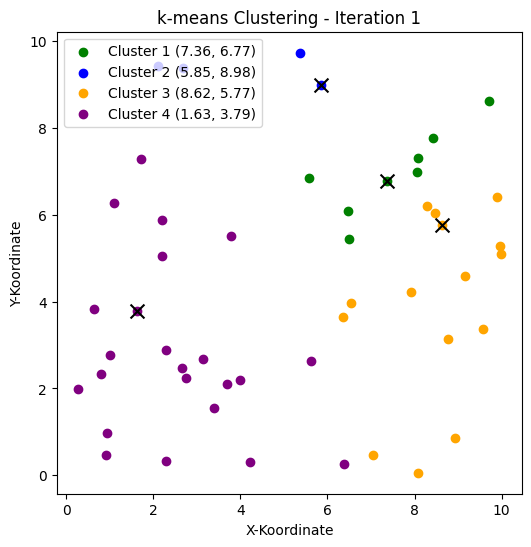

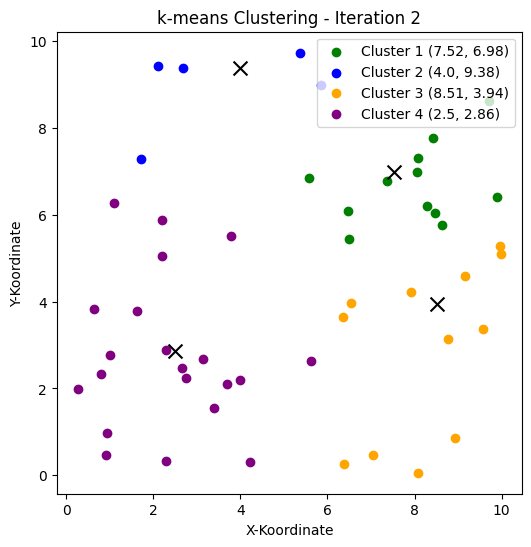

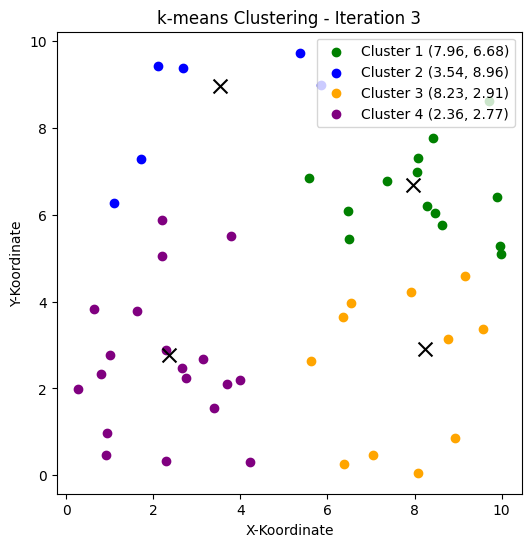

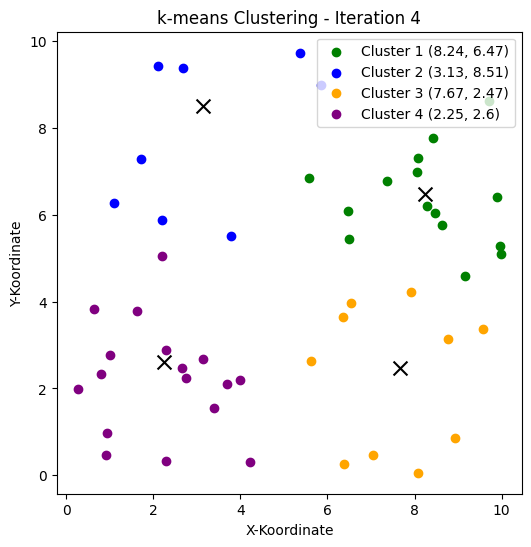

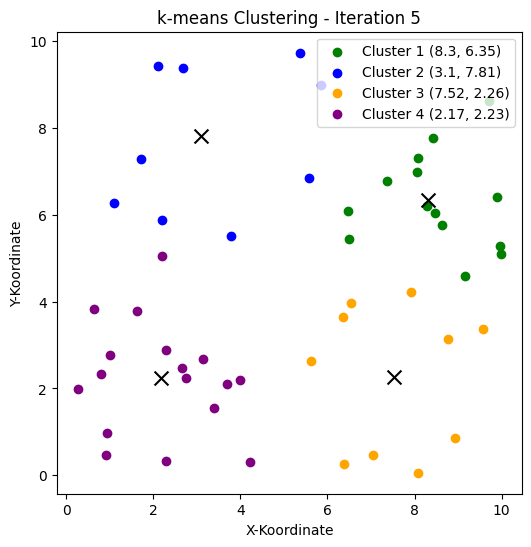

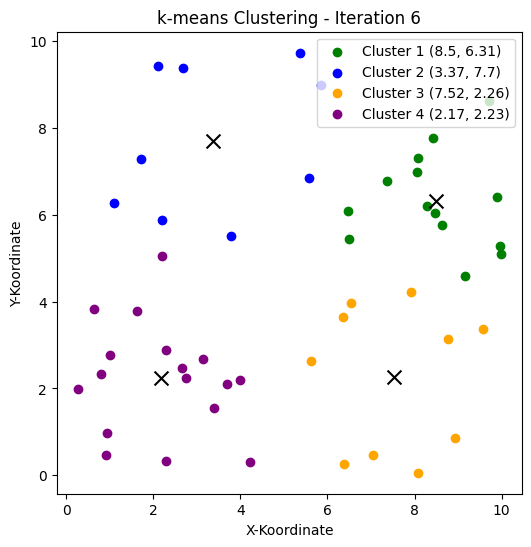

INFO: Zentroiden haben sich nicht mehr verändert. Algorithmus stoppt.


Cluster: [[Datenpunkt(7.36, 6.77), Datenpunkt(9.15, 4.59), Datenpunkt(9.98, 5.1), Datenpunkt(9.9, 6.4), Datenpunkt(8.29, 6.19), Datenpunkt(9.96, 5.29), Datenpunkt(8.06, 6.98), Datenpunkt(8.47, 6.04), Datenpunkt(6.48, 6.09), Datenpunkt(8.07, 7.3), Datenpunkt(9.71, 8.61), Datenpunkt(6.5, 5.45), Datenpunkt(8.43, 7.76), Datenpunkt(8.62, 5.77)], [Datenpunkt(5.57, 6.85), Datenpunkt(5.36, 9.73), Datenpunkt(3.79, 5.52), Datenpunkt(1.71, 7.29), Datenpunkt(2.67, 9.37), Datenpunkt(2.11, 9.43), Datenpunkt(2.2, 5.89), Datenpunkt(5.85, 8.98), Datenpunkt(1.1, 6.27)], [Datenpunkt(8.76, 3.15), Datenpunkt(7.92, 4.22), Datenpunkt(6.55, 3.96), Datenpunkt(7.05, 0.46), Datenpunkt(6.36, 3.65), Datenpunkt(9.57, 3.37), Datenpunkt(5.61, 2.63), Datenpunkt(8.92, 0.87), Datenpunkt(8.09, 0.06), Datenpunkt(6.39, 0.25)], [Datenpunkt(0.93, 0.97), Datenpunkt(0.64, 3.82), Datenpunkt(3.4, 1.55), Datenpunkt(1.63, 3.79), Datenpunkt(0.91, 0.47), Datenpunkt(4.22, 0.3), Datenpunkt(3.7, 2.1), Datenpunkt(2.28, 2.89), Datenpunkt

In [14]:
def k_means(datenpunkte: list[Datenpunkt], anzahl_cluster: int, max_iterationen: int, print_plots = False) -> tuple[list[list[Datenpunkt]], list[Datenpunkt]]:
    """
    Hauptfunktion für den k-means Algorithmus zur Clusterbildung. Der Algorithmus besteht aus folgenden Schritten:
    2. Initialisierung der Zentroiden
    3. Zuweisung der Datenpunkte und Bildung der Cluster
    4. Aktualisierung der Zentroiden
    5. Überprüfung, ob sich die Zentroiden verändert haben
    Args:
        datenpunkte: Liste der Datenpunkte, die geclustert werden sollen.
        anzahl_cluster: Anzahl der Cluster, die gebildet werden sollen.
        max_iterationen: Maximale Anzahl der Iterationen, die der Algorithmus durchführt.
        print_plots: Gibt an, ob die Cluster in jedem Schritt visualisiert werden
    Returns:
        tuple[list[list[Datenpunkt]], list[Datenpunkt]]: Die Cluster und die finalen Zentroiden.
    Examples:
        >>> datenpunkte = [Datenpunkt(1.0, 1.0), Datenpunkt(1.0, 3.0), Datenpunkt(3.0, 3.0), Datenpunkt(4.0, 2.0), Datenpunkt(5.0, 5.0)]
        >>> clusters, zentroiden = k_means(datenpunkte, 2, 100)
        >>> len(clusters)
        2
        >>> len(zentroiden)
        2
        >>> sum(len(cluster) for cluster in clusters) == len(datenpunkte)
        True
    """
    # 1. Initialisierung der Zentroiden
    zentroiden = initialisiere_zentroiden(datenpunkte, anzahl_cluster)
    cluster = []

    for iteration in range(max_iterationen):
        # 2. Cluster berechnen
        cluster = datenpunkte_zuweisen(datenpunkte, zentroiden)
        
        # Plot der Cluster ausgeben, wenn gewünscht
        if print_plots:
            plot_cluster(cluster, zentroiden, iteration + 1)
        
        # 3. Zentroiden aktualisieren
        neue_zentroiden = aktualisiere_zentroiden(cluster)
        
        # 4. Abbruch wenn die Zentroiden sich nicht verändert haben
        if neue_zentroiden == zentroiden:
            logger.info("Zentroiden haben sich nicht mehr verändert. Algorithmus stoppt.")
            break
        zentroiden = neue_zentroiden
    return cluster, zentroiden

# Unit Test für die Hauptfunktion
run_doctests_mit_lesbarer_ausgabe(k_means)

# Manueller Start des k-means Algorithmus
datenpunkte = generiere_datenpunkte(50, zahlenraum=10)
cluster, zentroiden = k_means(datenpunkte=datenpunkte, anzahl_cluster=4, max_iterationen=100, print_plots=True)

print(f"Cluster: {cluster}")
print(f"Zentroiden: {zentroiden}")


In [15]:
def berechne_abstand_quadrat(punkt1: Datenpunkt, punkt2: Datenpunkt) -> float:
    """
    Berechnet das Quadrat des euklidischen Abstands zwischen zwei Punkten.

    Args:
        punkt1: Der erste Datenpunkt.
        punkt2: Der zweite Datenpunkt.

    Returns:
        float: Das Quadrat des Abstands zwischen den Punkten.

    Examples:
        >>> p1 = Datenpunkt(1.0, 2.0)
        >>> p2 = Datenpunkt(4.0, 6.0)
        >>> berechne_abstand_quadrat(p1, p2)
        25.0
    """
    # Berechne den quadratischen Abstand zwischen zwei Punkten
    # Hinweis: du hast bereits den einfachen Abstand berechnet


def initialisiere_zentroiden_kmeans_pp(datenpunkte: list[Datenpunkt], anzahl_zentroiden: int) -> list[Datenpunkt]:
    """
    Initialisiert die Zentroiden mithilfe des k-means++-Algorithmus.
    
    Args:
        datenpunkte: Liste von Datenpunkten, aus denen die Zentroiden ausgewählt werden.
        anzahl_zentroiden: Anzahl der Zentroiden, die initialisiert werden sollen.

    Returns:
        list[Datenpunkt]: Liste der initialisierten Zentroiden.

    Examples:
        >>> datenpunkte = [
        ...     Datenpunkt(1.4, 4.5), Datenpunkt(5.2, 8.3),
        ...     Datenpunkt(3.1, 9.2), Datenpunkt(3.1, 6.2),
        ...     Datenpunkt(8.1, 1.2), Datenpunkt(7.2, 3.4)
        ... ]
        >>> result = initialisiere_zentroiden_kmeans_pp(datenpunkte, 2)
        >>> len(result)
        2
        >>> all(zentroid in datenpunkte for zentroid in result)
        True
    """
    # 1. Wähle ein zufälliges erstes Zentrum
    zentroiden = []
    zentroiden.append(random.choice(datenpunkte))

    # 2. Füge die restlichen Zentroiden iterativ hinzu
    while len(zentroiden) < anzahl_zentroiden:
        abstaende = []
        # Berechne die minimalen quadratischen Abstände jedes Punktes zu den Zentroiden
        for dp in datenpunkte:
            minimaler_abstand = float('inf')
            for zentroid in zentroiden:
                abstand = berechne_abstand_quadrat(dp, zentroid)
                if abstand < minimaler_abstand:
                    minimaler_abstand = abstand
            abstaende.append(minimaler_abstand)

        # Wahrscheinlichkeiten proportional zu den Abständen berechnen
        gesamt_abstand = sum(abstaende)
        wahrscheinlichkeiten = []
        for abstand in abstaende:
            wahrscheinlichkeiten.append(abstand / gesamt_abstand)

        # Wähle den nächsten Zentroiden basierend auf Wahrscheinlichkeiten
        neuer_zentroid = random.choices(datenpunkte, weights=wahrscheinlichkeiten, k=1)[0]
        zentroiden.append(neuer_zentroid)

    return zentroiden